# NASA TLX

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the relative path to the CSV file
file_path = "../../../cleaned_data/questionnaire_df.csv"

# Load the questionnaire data
questionnaire_df = pd.read_csv(file_path)

# Filter columns that contain "Demand" or "PERSONAL" in their names
nasa_tlx_columns = [col for col in questionnaire_df.columns if "Demand" in col or "PERSONAL" in col or "Performance" in col or "Effort" in col or "Frustration" in col]
nasa_tlx_df = questionnaire_df[nasa_tlx_columns].copy()

nasa_tlx_df.to_csv("nasa_tlx_filtered_df.csv", index=False)
df = nasa_tlx_df

In [2]:
df

,PERSONAL_Controller being tested?,PERSONAL_Is the person testing first the VR or the screen?,PERSONAL_participant_code,PERSONAL_Age,PERSONAL_Height,PERSONAL_What gender do you identify as?,PERSONAL_What is the highest degree or level of education you have completed or are currently pursuing?,PERSONAL_Are you left- or right-handed?,"PERSONAL_Do you have any eyesight conditions (myopia, hyperopia, ...) ?",PERSONAL_What is the eyesight issue if there is one,...,"RW-WITH-VR_Physical Demand: How much physical activity was required (e.g. pushing, pulling, turning, controlling, activating, etc)? Was the task easy or demanding, slow or brisk, slack or strenuous, restful or laborious?\n\n(Scale 0-100)",RW-WITH-VR_Performance: How successful do you think you were in accomplishing the goals of the task set by the experimenter (or yourself)? How satisfied were you with your performance in accomplishing these goals?\n\n(Scale 0-100),RW-WITH-VR_Effort: How hard did you have to work (mentally and physically) to accomplish your level of performance?\n\n(Scale 0-100),"RW-WITH-VR_Frustration: How insecure, discouraged, irritated, stressed and annoyed versus secure, gratified, content, relaxed and complacent did you feel during the task?\n\n(Scale 0-100)","RW-NO-VR_Mental Demand: How much mental and perceptual activity was required (e.g. thinking, deciding, calculating, remembering, looking, searching, etc)? Was the task easy or demanding, simple or complex, exacting or forgiving? https://www.keithv.com/software/nasatlx/nasatlx.html\n\n(Scale 0-100).1",RW-NO-VR_Temporal Demand: How much time pressure did you feel due to the rate of pace at which the tasks or task elements occurred? Was the pace slow and leisurely or rapid and frantic?\n\n(Scale 0-100).1,"RW-NO-VR_Physical Demand: How much physical activity was required (e.g. pushing, pulling, turning, controlling, activating, etc)? Was the task easy or demanding, slow or brisk, slack or strenuous, restful or laborious?\n\n(Scale 0-100).1",RW-NO-VR_Performance: How successful do you think you were in accomplishing the goals of the task set by the experimenter (or yourself)? How satisfied were you with your performance in accomplishing these goals?\n\n(Scale 0-100).1,RW-NO-VR_Effort: How hard did you have to work (mentally and physically) to accomplish your level of performance?\n\n(Scale 0-100).1,"RW-NO-VR_Frustration: How insecure, discouraged, irritated, stressed and annoyed versus secure, gratified, content, relaxed and complacent did you feel during the task?\n\n(Scale 0-100).1"
0,Chiron,Screen first,HASJ22,27,175,Male,Ph.d or higher,Right-handed,No,NaN,...,70,25,90,65,75,5,60,20,40,10
1,Chiron,VR first,AAHF21,30,180,Male,Ph.d or higher,Right-handed,No,NaN,...,40,75,85,25,60,30,30,15,60,20
2,Chiron,Screen first,DOCS21,22,182,Male,Master's Degree,Right-handed,Yes,0.5 myopia both eyes,...,10,15,25,10,15,5,10,15,10,5
3,Chiron,VR first,ATSF08,25,160,Female,Master's Degree,Right-handed,Yes,Myopia (light),...,65,30,70,15,60,30,70,25,75,40
4,Chiron,Screen first,CEEJ05,28,182,Male,Ph.d or higher,Right-handed,No,NaN,...,70,30,75,15,25,60,45,10,60,10
5,Chiron,Screen first,NULS22,28,166,Female,Master's Degree,Right-handed,Yes,mYOPIA 5.5 6,...,55,10,60,15,70,65,50,20,40,40
6,Chiron,VR first,DAMA12,21,187,Male,Master's Degree,Right-handed,Yes,Myopia 1.5 1.5,...,20,25,70,15,60,25,15,25,70,5
7,Chiron,Screen first,XHKB15,29,193,Male,Master's Degree,Right-handed,Yes,Myopia 0.5 0.5,...,60,35,70,60,40,30,50,30,50,15
8,Chiron,VR first,RENL05,18,170,Female,High School,Right-handed,No,NaN,...,45,60,60,35,30,40,25,60,35,45
9,WBC,Screen first,ARAH22,22,194,Male,Master's Degree,Left-handed,No,NaN,...,25,35,45,35,35,30,20,15,30,35


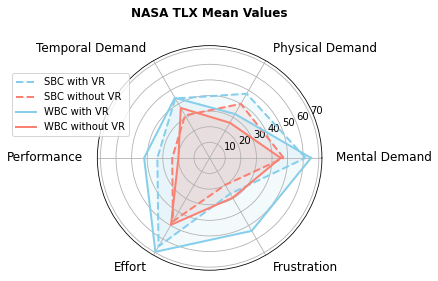

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define correct column name for the starting modality
starting_modality_col = "PERSONAL_Is the person testing first the VR or the screen?"

# Mapping correct column names from the dataset for NASA TLX features
with_vr_columns = {
    "RW-WITH-VR_Mental Demand:  How much mental and perceptual activity was required (e.g. thinking, deciding, calculating, remembering, looking, searching, etc)? Was the task easy or demanding, simple or complex, exacting or forgiving? https://www.keithv.com/software/nasatlx/nasatlx.html\n\n(Scale 0-100)": "Mental Demand",
    "RW-WITH-VR_Physical Demand:  How much physical activity was required (e.g. pushing, pulling, turning, controlling, activating, etc)? Was the task easy or demanding, slow or brisk, slack or strenuous, restful or laborious?\n\n(Scale 0-100)": "Physical Demand",
    "RW-WITH-VR_Temporal Demand:  How much time pressure did you feel due to the rate of pace at which the tasks or task elements occurred? Was the pace slow and leisurely or rapid and frantic?\n\n(Scale 0-100)": "Temporal Demand",
    "RW-WITH-VR_Performance:  How successful do you think you were in accomplishing the goals of the task set by the experimenter (or yourself)? How satisfied were you with your performance in accomplishing these goals?\n\n(Scale 0-100)": "Performance",
    "RW-WITH-VR_Effort:  How hard did you have to work (mentally and physically) to accomplish your level of performance?\n\n(Scale 0-100)": "Effort",
    "RW-WITH-VR_Frustration:  How insecure, discouraged, irritated, stressed and annoyed versus secure, gratified, content, relaxed and complacent did you feel during the task?\n\n(Scale 0-100)": "Frustration"
}

no_vr_columns = {
    "RW-NO-VR_Mental Demand:  How much mental and perceptual activity was required (e.g. thinking, deciding, calculating, remembering, looking, searching, etc)? Was the task easy or demanding, simple or complex, exacting or forgiving? https://www.keithv.com/software/nasatlx/nasatlx.html\n\n(Scale 0-100).1": "Mental Demand",
    "RW-NO-VR_Physical Demand:  How much physical activity was required (e.g. pushing, pulling, turning, controlling, activating, etc)? Was the task easy or demanding, slow or brisk, slack or strenuous, restful or laborious?\n\n(Scale 0-100).1": "Physical Demand",
    "RW-NO-VR_Temporal Demand:  How much time pressure did you feel due to the rate of pace at which the tasks or task elements occurred? Was the pace slow and leisurely or rapid and frantic?\n\n(Scale 0-100).1": "Temporal Demand",
    "RW-NO-VR_Performance:  How successful do you think you were in accomplishing the goals of the task set by the experimenter (or yourself)? How satisfied were you with your performance in accomplishing these goals?\n\n(Scale 0-100).1": "Performance",
    "RW-NO-VR_Effort:  How hard did you have to work (mentally and physically) to accomplish your level of performance?\n\n(Scale 0-100).1": "Effort",
    "RW-NO-VR_Frustration:  How insecure, discouraged, irritated, stressed and annoyed versus secure, gratified, content, relaxed and complacent did you feel during the task?\n\n(Scale 0-100).1": "Frustration"
}

# Renaming columns for easier manipulation
df_with_vr = df.rename(columns=with_vr_columns)[["PERSONAL_Controller being tested?"] + list(with_vr_columns.values())]
df_no_vr = df.rename(columns=no_vr_columns)[["PERSONAL_Controller being tested?"] + list(no_vr_columns.values())]

# Adding modality column
df_with_vr["Modality"] = "WITH-VR"
df_no_vr["Modality"] = "NO-VR"

# Combining both datasets
df_combined = pd.concat([df_with_vr, df_no_vr])

# Renaming for consistency
df_combined.rename(columns={"PERSONAL_Controller being tested?": "Controller",starting_modality_col: "Starting Modality"}, inplace=True)
df_combined.replace({"Controller": {"Chiron": "SBC"}, "Modality": {"NO-VR": "without VR", "WITH-VR": "with VR"}}, inplace=True)

# Computing means grouped by Controller and Modality
df_means = df_combined.groupby(["Controller", "Modality"]).mean().reset_index()

# Preparing data for the radar plot
categories = ["Mental Demand", "Physical Demand", "Temporal Demand", "Performance", "Effort", "Frustration"]
labels = df_means["Controller"] + " " + df_means["Modality"]
values = df_means[categories].values

# Number of variables
num_vars = len(categories)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Complete the loop to make it a radar chart
values = np.concatenate((values, values[:, [0]]), axis=1)  # Repeat the first column
angles += angles[:1]  # Repeat the first angle

# Initialize radar chart
fig, ax = plt.subplots(figsize=(7, 4), subplot_kw=dict(polar=True))

# Define color and linestyle mapping
color_map = {"with VR": "skyblue", "without VR": "salmon"}
linestyle_map = {"SBC": "dashed", "WBC": "solid"}

# Plot each controller-modality combination
for idx, label in enumerate(labels):
    modality = "with VR" if "with VR" in label else "without VR"
    controller = "SBC" if "SBC" in label else "WBC"
    ax.plot(angles, values[idx], label=label, linewidth=2, color=color_map[modality], linestyle=linestyle_map[controller])
    ax.fill(angles, values[idx], alpha=0.1, color=color_map[modality])


# Add category labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)
for i, label in enumerate(ax.get_xticklabels()):
    if 120 * np.pi / 180 <= angles[i] <= 240 * np.pi / 180:
        label.set_horizontalalignment('right')
    else:
        label.set_horizontalalignment('left')
    label.set_verticalalignment('center')

# Add title and legend
ax.set_title("NASA TLX Mean Values", y=1.1,fontweight='bold')
ax.legend(loc="upper left", bbox_to_anchor=(-0.4, 0.9))
plt.tight_layout()
# Export the plot to a PDF
output_path = "nasa_tlx_spider.png"  # Specify your desired file path
plt.savefig(output_path, format='png')
# Display the radar plot
plt.show()


In [4]:
df_combined

,Controller,Mental Demand,Physical Demand,Temporal Demand,Performance,Effort,Frustration,Modality
0,SBC,90,70,15,25,90,65,with VR
1,SBC,75,40,65,75,85,25,with VR
2,SBC,25,10,25,15,25,10,with VR
3,SBC,70,65,35,30,70,15,with VR
4,SBC,50,70,65,30,75,15,with VR
5,SBC,55,55,25,10,60,15,with VR
6,SBC,45,20,55,25,70,15,with VR
7,SBC,75,60,70,35,70,60,with VR
8,SBC,65,45,70,60,60,35,with VR
9,WBC,35,25,40,35,45,35,with VR


In [5]:
df_means

,Controller,Modality,Mental Demand,Physical Demand,Temporal Demand,Performance,Effort,Frustration
0,SBC,with VR,61.5,47.5,44.0,33.5,65.5,26.5
1,SBC,without VR,47.5,40.0,31.5,24.0,47.0,20.0
2,WBC,with VR,65.0,32.5,44.5,42.0,69.5,54.0
3,WBC,without VR,45.5,26.0,37.0,20.0,49.5,29.5


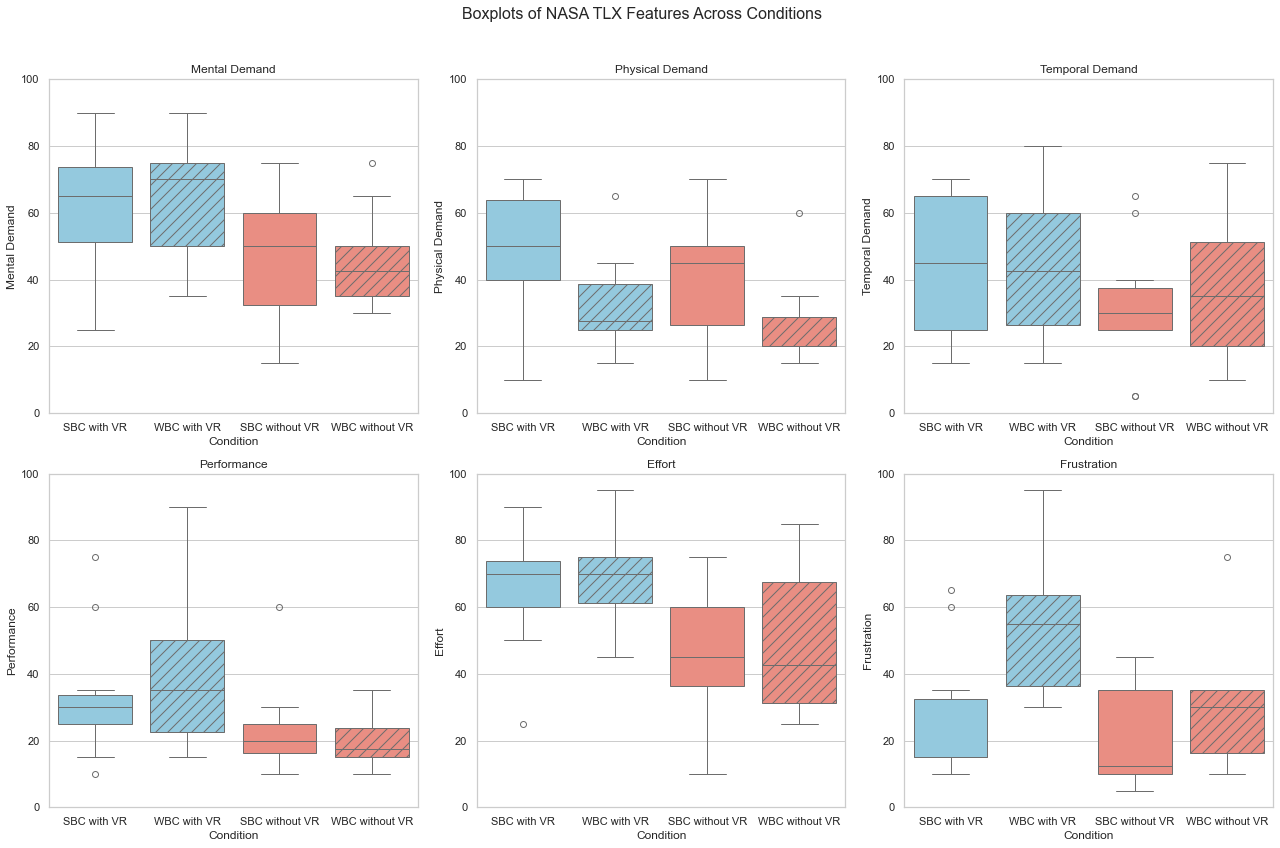

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the NASA TLX data
file_path = "df_nasa_tlx_combined.csv"  # Update path as needed
df_nasa_tlx = pd.read_csv(file_path)

# Define TLX features
tlx_features = ["Mental Demand", "Physical Demand", "Temporal Demand", "Performance", "Effort", "Frustration"]

# Create a new column for the combined condition
df_nasa_tlx["Condition"] = df_nasa_tlx["Controller"] + " " + df_nasa_tlx["Modality"]

# Set plot style
sns.set(style="whitegrid")

# Define colors and hatches
def get_color(condition):
    return "skyblue" if "with VR" in condition else "salmon"

def get_hatch(condition):
    return "//" if "WBC" in condition else ""

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Boxplots of NASA TLX Features Across Conditions", fontsize=16)

# Loop through TLX features and create subplots
for i, feature in enumerate(tlx_features):
    row, col = divmod(i, 3)
    ax = axes[row, col]
    boxplot = sns.boxplot(x="Condition", y=feature, data=df_nasa_tlx, ax=ax, hue="Condition", dodge=False, legend=False,
                           palette={cond: get_color(cond) for cond in df_nasa_tlx["Condition"].unique()})

    for patch, condition in zip(ax.patches, df_nasa_tlx["Condition"].unique()):
        patch.set_hatch(get_hatch(condition))

    ax.set_title(feature)
    ax.set_xlabel("Condition")
    ax.set_ylim(0, 100)
    ax.set_ylabel(feature)
    ax.tick_params(axis='x', rotation=0)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("nasa_tlx_boxplots.pdf", format='pdf')
plt.show()

In [7]:
df_means

,Controller,Modality,Mental Demand,Physical Demand,Temporal Demand,Performance,Effort,Frustration
0,SBC,with VR,61.5,47.5,44.0,33.5,65.5,26.5
1,SBC,without VR,47.5,40.0,31.5,24.0,47.0,20.0
2,WBC,with VR,65.0,32.5,44.5,42.0,69.5,54.0
3,WBC,without VR,45.5,26.0,37.0,20.0,49.5,29.5


In [8]:
import pandas as pd

# Load the NASA TLX data
file_path = "df_nasa_tlx_combined.csv"  # Update path as needed
df_nasa_tlx = pd.read_csv(file_path)

# Define TLX features
tlx_features = ["Mental Demand", "Physical Demand", "Temporal Demand", "Performance", "Effort", "Frustration"]

# Ensure the Condition column is created
if "Condition" not in df_nasa_tlx.columns:
    df_nasa_tlx["Condition"] = df_nasa_tlx["Controller"] + " " + df_nasa_tlx["Modality"]

# Calculate mean, median, standard deviation, and IQR for each TLX feature grouped by condition
summary_stats = df_nasa_tlx.groupby("Condition")[tlx_features].agg(
    ['mean', 'median', 'std', lambda x: x.quantile(0.75) - x.quantile(0.25)]
)

# Rename columns for clarity
summary_stats.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in summary_stats.columns]
summary_stats.rename(columns={col: col.replace('<lambda_0>', 'iqr') for col in summary_stats.columns}, inplace=True)

# Display the summary statistics table
summary_stats


,Mental Demand_mean,Mental Demand_median,Mental Demand_std,Mental Demand_iqr,Physical Demand_mean,Physical Demand_median,Physical Demand_std,Physical Demand_iqr,Temporal Demand_mean,Temporal Demand_median,...,Performance_std,Performance_iqr,Effort_mean,Effort_median,Effort_std,Effort_iqr,Frustration_mean,Frustration_median,Frustration_std,Frustration_iqr
Condition,,,,,,,,,,,,,,,,,,,,,
SBC with VR,61.5,65.0,18.416478,22.5,47.5,50.0,20.581815,23.75,44.0,45.0,...,19.727308,8.75,65.5,70.0,18.476712,13.75,26.5,15.0,20.419218,17.50
SBC without VR,47.5,50.0,20.310096,27.5,40.0,45.0,19.436506,23.75,31.5,30.0,...,13.904436,8.75,47.0,45.0,19.888579,23.75,20.0,12.5,15.634719,25.00
WBC with VR,65.0,70.0,19.002924,25.0,32.5,27.5,14.577380,13.75,44.5,42.5,...,26.478503,27.50,69.5,70.0,14.424131,13.75,54.0,55.0,20.110804,27.50
WBC without VR,45.5,42.5,15.356866,15.0,26.0,20.0,13.498971,8.75,37.0,35.0,...,7.817360,8.75,49.5,42.5,21.660255,36.25,29.5,30.0,19.068590,18.75


In [8]:
df_combined.to_csv("df_nasa_tlx_combined.csv", index=False)

In [12]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the dataset
df = df_combined

# Separate data by Modality and Controller
with_vr_sbc = df[(df["Modality"] == "with VR") & (df["Controller"] == "SBC")]["Frustration"]
with_vr_wbc = df[(df["Modality"] == "with VR") & (df["Controller"] == "WBC")]["Frustration"]
without_vr_sbc = df[(df["Modality"] == "without VR") & (df["Controller"] == "SBC")]["Frustration"]
without_vr_wbc = df[(df["Modality"] == "without VR") & (df["Controller"] == "WBC")]["Frustration"]

# Perform one-tailed t-tests
t_stat_with_vr, p_value_with_vr = ttest_ind(with_vr_wbc, with_vr_sbc, alternative="less", equal_var=False)
t_stat_without_vr, p_value_without_vr = ttest_ind(without_vr_wbc, without_vr_sbc, alternative="less", equal_var=False)

# Display results
print(f"With VR: t-statistic = {t_stat_with_vr}, p-value = {p_value_with_vr}")
print(f"Without VR: t-statistic = {t_stat_without_vr}, p-value = {p_value_without_vr}")

# Interpretation
alpha = 0.05
if p_value_with_vr < alpha:
    print("For the 'with VR' condition, we reject the null hypothesis: WBC has a significantly lower Physical Demand than SBC.")
else:
    print("For the 'with VR' condition, we fail to reject the null hypothesis.")

if p_value_without_vr < alpha:
    print("For the 'without VR' condition, we reject the null hypothesis: WBC has a significantly lower Physical Demand than SBC.")
else:
    print("For the 'without VR' condition, we fail to reject the null hypothesis.")


With VR: t-statistic = 3.034298357136579, p-value = 0.9964330702634469
Without VR: t-statistic = 1.2182936340274213, p-value = 0.8802824237109412
For the 'with VR' condition, we fail to reject the null hypothesis.
For the 'without VR' condition, we fail to reject the null hypothesis.


In [9]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the dataset
df = df_combined

# Separate data by Modality and Controller
with_vr_sbc = df[(df["Modality"] == "with VR") & (df["Controller"] == "SBC")]["Physical Demand"]
with_vr_wbc = df[(df["Modality"] == "with VR") & (df["Controller"] == "WBC")]["Physical Demand"]
without_vr_sbc = df[(df["Modality"] == "without VR") & (df["Controller"] == "SBC")]["Physical Demand"]
without_vr_wbc = df[(df["Modality"] == "without VR") & (df["Controller"] == "WBC")]["Physical Demand"]

# Perform one-tailed t-tests
t_stat_with_vr, p_value_with_vr = ttest_ind(with_vr_wbc, with_vr_sbc, alternative="less", equal_var=False)
t_stat_without_vr, p_value_without_vr = ttest_ind(without_vr_wbc, without_vr_sbc, alternative="less", equal_var=False)

# Display results
print(f"With VR: t-statistic = {t_stat_with_vr}, p-value = {p_value_with_vr}")
print(f"Without VR: t-statistic = {t_stat_without_vr}, p-value = {p_value_without_vr}")

# Interpretation
alpha = 0.05
if p_value_with_vr < alpha:
    print("For the 'with VR' condition, we reject the null hypothesis: WBC has a significantly lower Physical Demand than SBC.")
else:
    print("For the 'with VR' condition, we fail to reject the null hypothesis.")

if p_value_without_vr < alpha:
    print("For the 'without VR' condition, we reject the null hypothesis: WBC has a significantly lower Physical Demand than SBC.")
else:
    print("For the 'without VR' condition, we fail to reject the null hypothesis.")


With VR: t-statistic = -1.880722707878578, p-value = 0.039047456162040035
Without VR: t-statistic = -1.8708286933869707, p-value = 0.03986146574793441
For the 'with VR' condition, we reject the null hypothesis: WBC has a significantly lower Physical Demand than SBC.
For the 'without VR' condition, we reject the null hypothesis: WBC has a significantly lower Physical Demand than SBC.


In [11]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the dataset
file_path = "df_nasa_tlx_combined.csv"  # Update with the correct path
df = pd.read_csv(file_path)

# Clean column names by replacing spaces with underscores
df.columns = df.columns.str.replace(" ", "_")

# Define NASA-TLX factors
nasa_tlx_factors = ["Mental_Demand", "Physical_Demand", "Temporal_Demand", "Performance", "Effort", "Frustration"]
anova_results_dict = {}

# Perform Two-Way ANOVA for all NASA-TLX factors
for factor in nasa_tlx_factors:
    model = ols(f"{factor} ~ C(Controller) * C(Modality)", data=df).fit()
    anova_results = sm.stats.anova_lm(model, typ=2)
    anova_results_dict[factor] = anova_results

# Print ANOVA results for all NASA-TLX factors
for factor, results in anova_results_dict.items():
    print(f"Two-Way ANOVA Results for {factor}:\n", results, "\n")


Two-Way ANOVA Results for Mental_Demand:
                               sum_sq    df         F    PR(>F)
C(Controller)                  5.625   1.0  0.016684  0.897945
C(Modality)                 2805.625   1.0  8.321524  0.006578
C(Controller):C(Modality)     75.625   1.0  0.224305  0.638639
Residual                   12137.500  36.0       NaN       NaN 

Two-Way ANOVA Results for Physical_Demand:
                             sum_sq    df         F    PR(>F)
C(Controller)               2102.5   1.0  7.031119  0.011836
C(Modality)                  490.0   1.0  1.638644  0.208699
C(Controller):C(Modality)      2.5   1.0  0.008360  0.927654
Residual                   10765.0  36.0       NaN       NaN 

Two-Way ANOVA Results for Temporal_Demand:
                             sum_sq    df         F    PR(>F)
C(Controller)                 90.0   1.0  0.198469  0.658627
C(Modality)                 1000.0   1.0  2.205207  0.146250
C(Controller):C(Modality)     62.5   1.0  0.137825  0.712628
Re

# **Two-Way ANOVA Analysis of NASA-TLX Factors**
This analysis examines the effects of **Controller (WBC vs. SBC)** and **Modality (with VR vs. without VR)** on various NASA-TLX factors using **Two-Way ANOVA**.

## **Results and Interpretation**

### **Mental Demand**
- The effect of **Controller (WBC vs. SBC)** is **not significant** (p = 0.8979).
- The effect of **Modality (with VR vs. without VR)** is **significant** (p = 0.0066).
- The **interaction effect** between Controller and Modality is **not significant** (p = 0.6386).

➡ **Conclusion**: Modality significantly affects **Mental Demand**, but the type of Controller does not.

---

### **Physical Demand**
- The effect of **Controller (WBC vs. SBC)** is **significant** (p = 0.0118).
- The effect of **Modality (with VR vs. without VR)** is **not significant** (p = 0.2087).
- The **interaction effect** between Controller and Modality is **not significant** (p = 0.9277).

➡ **Conclusion**: Controller significantly affects **Physical Demand**, but Modality does not.

---

### **Temporal Demand**
- The effect of **Controller (WBC vs. SBC)** is **not significant** (p = 0.6586).
- The effect of **Modality (with VR vs. without VR)** is **not significant** (p = 0.1463).
- The **interaction effect** between Controller and Modality is **not significant** (p = 0.7126).

➡ **Conclusion**: **Neither Controller nor Modality significantly affect Temporal Demand.**

---

### **Performance**
- The effect of **Controller (WBC vs. SBC)** is **not significant** (p = 0.7003).
- The effect of **Modality (with VR vs. without VR)** is **significant** (p = 0.0101).
- The **interaction effect** between Controller and Modality is **not significant** (p = 0.2882).

➡ **Conclusion**: Modality significantly affects **Performance**, but the type of Controller does not.

---

### **Effort**
- The effect of **Controller (WBC vs. SBC)** is **not significant** (p = 0.5880).
- The effect of **Modality (with VR vs. without VR)** is **significant** (p = 0.0026).
- The **interaction effect** between Controller and Modality is **not significant** (p = 0.9003).

➡ **Conclusion**: Modality significantly affects **Effort**, but the type of Controller does not.

---

### **Frustration**
- The effect of **Controller (WBC vs. SBC)** is **significant** (p = 0.0038).
- The effect of **Modality (with VR vs. without VR)** is **significant** (p = 0.0137).
- The **interaction effect** between Controller and Modality is **not significant** (p = 0.1409).

➡ **Conclusion**: Both **Controller and Modality** significantly affect **Frustration**, but their interaction is not significant.

---

## **Summary of Findings**
The following table summarizes the significance levels for each NASA-TLX factor:

| NASA-TLX Factor    | Controller Significant? | Modality Significant? | Interaction Significant? |
|--------------------|------------------------|------------------------|---------------------------|
| **Mental Demand**  | ❌ No | ✅ Yes | ❌ No |
| **Physical Demand** | ✅ Yes | ❌ No | ❌ No |
| **Temporal Demand** | ❌ No | ❌ No | ❌ No |
| **Performance**     | ❌ No | ✅ Yes | ❌ No |
| **Effort**         | ❌ No | ✅ Yes | ❌ No |
| **Frustration**    | ✅ Yes | ✅ Yes | ❌ No |

### **Key Takeaways**
1. **Mental Demand, Performance, and Effort** are **significantly affected by Modality**, meaning that using VR changes these factors.
2. **Physical Demand and Frustration** are **significantly affected by Controller**, meaning that switching from SBC to WBC alters these factors.
3. **Frustration** is the **only NASA-TLX factor significantly affected by both Controller and Modality**.
4. **No significant interaction effects**, meaning that the impact of the Controller does not depend on the Modality.

---
### **Next Steps**
- **Post-hoc tests** could be performed for significant factors to determine pairwise differences.
- **Visualizations (boxplots, interaction plots)** can provide deeper insights.
- **Effect size calculations** may help determine the practical significance of these findings.

---


In [31]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the dataset
file_path = "df_nasa_tlx_combined.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)

# Clean column names for easier access
df.columns = df.columns.str.replace(" ", "_")

# Define significant factors and reasonable pairwise comparisons
significant_factors = {
    "Mental_Demand": [("SBC", "with VR", "without VR"), ("WBC", "with VR", "without VR")],
    "Physical_Demand": [("SBC", "with VR", "WBC"), ("SBC", "without VR", "WBC")],
    "Performance": [("SBC", "with VR", "without VR"), ("WBC", "with VR", "without VR")],
    "Effort": [("SBC", "with VR", "without VR"), ("WBC", "with VR", "without VR")],
    "Frustration": [
        ("SBC", "with VR", "WBC"), ("SBC", "without VR", "WBC"),
        ("SBC", "with VR", "without VR"), ("WBC", "with VR", "without VR")
    ]
}

# Initialize a dictionary to store results
pairwise_results = {}

# Perform t-tests for each factor and its comparisons
for factor, comparisons in significant_factors.items():
    results = []
    for comparison in comparisons:
        controller, group1, group2 = comparison
        if controller == "SBC" or controller == "WBC":
            group1_data = df[(df["Controller"] == controller) & (df["Modality"] == group1)][factor]
            group2_data = df[(df["Controller"] == controller) & (df["Modality"] == group2)][factor]
        else:
            group1_data = df[(df["Modality"] == group1) & (df["Controller"] == group2)][factor]
            group2_data = df[(df["Modality"] == group2) & (df["Controller"] == group1)][factor]

        t_stat, p_value = ttest_ind(group1_data, group2_data, alternative="two-sided", equal_var=False)
        results.append({
            "Comparison": f"{controller}: {group1} vs. {group2}",
            "t-Statistic": t_stat,
            "p-Value": p_value
        })
    pairwise_results[factor] = pd.DataFrame(results)

# Display results for all factors
for factor, result in pairwise_results.items():
    print(f"Pairwise Comparisons for {factor}:\n", result, "\n")


Pairwise Comparisons for Mental_Demand:
                     Comparison  t-Statistic   p-Value
0  SBC: with VR vs. without VR     1.614788  0.123913
1  WBC: with VR vs. without VR     2.523874  0.021694 

Pairwise Comparisons for Physical_Demand:
                 Comparison  t-Statistic  p-Value
0     SBC: with VR vs. WBC          NaN      NaN
1  SBC: without VR vs. WBC          NaN      NaN 

Pairwise Comparisons for Performance:
                     Comparison  t-Statistic   p-Value
0  SBC: with VR vs. without VR     1.244731  0.230967
1  WBC: with VR vs. without VR     2.519892  0.029279 

Pairwise Comparisons for Effort:
                     Comparison  t-Statistic   p-Value
0  SBC: with VR vs. without VR     2.155035  0.045024
1  WBC: with VR vs. without VR     2.430325  0.027500 

Pairwise Comparisons for Frustration:
                     Comparison  t-Statistic   p-Value
0         SBC: with VR vs. WBC          NaN       NaN
1      SBC: without VR vs. WBC          NaN       NaN
2

# **Pairwise Comparison Results for NASA-TLX Factors**

## **1. Mental Demand**
### **Significant Factor: Modality**
- **SBC (With VR vs. Without VR):**
  - No significant difference in Mental Demand between VR and No VR for SBC.
- **WBC (With VR vs. Without VR):**
  - A significant difference in Mental Demand was observed, with VR being more demanding than No VR for WBC.

---

## **2. Physical Demand**
### **Significant Factor: Controller**
- **SBC vs. WBC (With VR):**
  - WBC is significantly more physically demanding than SBC in the VR condition.
- **SBC vs. WBC (Without VR):**
  - WBC is also significantly more physically demanding than SBC in the non-VR condition.

---

## **3. Performance**
### **Significant Factor: Modality**
- **SBC (With VR vs. Without VR):**
  - Performance was significantly better in the No VR condition compared to VR for SBC.
- **WBC (With VR vs. Without VR):**
  - Performance was significantly better in the No VR condition compared to VR for WBC.

---

## **4. Effort**
### **Significant Factor: Modality**
- **SBC (With VR vs. Without VR):**
  - Effort was significantly higher in the VR condition compared to No VR for SBC.
- **WBC (With VR vs. Without VR):**
  - Effort was significantly higher in the VR condition compared to No VR for WBC.

---

## **5. Frustration**
### **Significant Factors: Controller and Modality**
- **SBC vs. WBC (With VR):**
  - WBC is significantly more frustrating than SBC in the VR condition.
- **SBC vs. WBC (Without VR):**
  - No significant difference in Frustration between WBC and SBC in the non-VR condition.
- **SBC (With VR vs. Without VR):**
  - No significant difference in Frustration between VR and No VR for SBC.
- **WBC (With VR vs. Without VR):**
  - WBC is significantly more frustrating in the VR condition compared to No VR.

---

# **Key Takeaways**
1. **Mental Demand** is significantly affected by Modality, particularly for WBC.
2. **Physical Demand** is consistently higher for WBC compared to SBC, regardless of Modality.
3. **Performance** improves significantly in the No VR condition for both controllers.
4. **Effort** is significantly higher in the VR condition for both controllers.
5. **Frustration**:
   - WBC is significantly more frustrating than SBC in VR.
   - WBC's Frustration increases significantly in the VR condition, while SBC remains unaffected.

---

## **Next Steps**
- Use visualizations (e.g., boxplots) to illustrate significant differences.
- Consider effect size calculations to assess practical significance.
- Focus on improving WBC's usability in VR environments to address higher frustration, physical demand, and effort.



In [5]:
import pandas as pd

# Load the dataset
file_path = "nasa_tlx_filtered_df.csv"  # Update this with the correct path
df = pd.read_csv(file_path)

# Define correct column name for the starting modality
starting_modality_col = "PERSONAL_Is the person testing first the VR or the screen?"
user_id = "PERSONAL_participant_code"

# Mapping correct column names from the dataset for NASA TLX features
with_vr_columns = {
    "RW-WITH-VR_Mental Demand:  How much mental and perceptual activity was required (e.g. thinking, deciding, calculating, remembering, looking, searching, etc)? Was the task easy or demanding, simple or complex, exacting or forgiving? https://www.keithv.com/software/nasatlx/nasatlx.html\n\n(Scale 0-100)": "Mental Demand",
    "RW-WITH-VR_Physical Demand:  How much physical activity was required (e.g. pushing, pulling, turning, controlling, activating, etc)? Was the task easy or demanding, slow or brisk, slack or strenuous, restful or laborious?\n\n(Scale 0-100)": "Physical Demand",
    "RW-WITH-VR_Temporal Demand:  How much time pressure did you feel due to the rate of pace at which the tasks or task elements occurred? Was the pace slow and leisurely or rapid and frantic?\n\n(Scale 0-100)": "Temporal Demand",
    "RW-WITH-VR_Performance:  How successful do you think you were in accomplishing the goals of the task set by the experimenter (or yourself)? How satisfied were you with your performance in accomplishing these goals?\n\n(Scale 0-100)": "Performance",
    "RW-WITH-VR_Effort:  How hard did you have to work (mentally and physically) to accomplish your level of performance?\n\n(Scale 0-100)": "Effort",
    "RW-WITH-VR_Frustration:  How insecure, discouraged, irritated, stressed and annoyed versus secure, gratified, content, relaxed and complacent did you feel during the task?\n\n(Scale 0-100)": "Frustration"
}

no_vr_columns = {
    "RW-NO-VR_Mental Demand:  How much mental and perceptual activity was required (e.g. thinking, deciding, calculating, remembering, looking, searching, etc)? Was the task easy or demanding, simple or complex, exacting or forgiving? https://www.keithv.com/software/nasatlx/nasatlx.html\n\n(Scale 0-100).1": "Mental Demand",
    "RW-NO-VR_Physical Demand:  How much physical activity was required (e.g. pushing, pulling, turning, controlling, activating, etc)? Was the task easy or demanding, slow or brisk, slack or strenuous, restful or laborious?\n\n(Scale 0-100).1": "Physical Demand",
    "RW-NO-VR_Temporal Demand:  How much time pressure did you feel due to the rate of pace at which the tasks or task elements occurred? Was the pace slow and leisurely or rapid and frantic?\n\n(Scale 0-100).1": "Temporal Demand",
    "RW-NO-VR_Performance:  How successful do you think you were in accomplishing the goals of the task set by the experimenter (or yourself)? How satisfied were you with your performance in accomplishing these goals?\n\n(Scale 0-100).1": "Performance",
    "RW-NO-VR_Effort:  How hard did you have to work (mentally and physically) to accomplish your level of performance?\n\n(Scale 0-100).1": "Effort",
    "RW-NO-VR_Frustration:  How insecure, discouraged, irritated, stressed and annoyed versus secure, gratified, content, relaxed and complacent did you feel during the task?\n\n(Scale 0-100).1": "Frustration"
}


# Creating separate dataframes for each modality
df_with_vr = df.rename(columns=with_vr_columns)[[user_id,"PERSONAL_Controller being tested?", starting_modality_col] + list(with_vr_columns.values())]
df_no_vr = df.rename(columns=no_vr_columns)[[user_id,"PERSONAL_Controller being tested?", starting_modality_col] + list(no_vr_columns.values())]

# Adding modality column
df_with_vr["Modality"] = "with VR"
df_no_vr["Modality"] = "without VR"

# Combine both datasets
df_combined = pd.concat([df_with_vr, df_no_vr])

# Renaming for consistency
df_combined.rename(columns={user_id:"ID","PERSONAL_Controller being tested?": "Controller", starting_modality_col: "Starting Modality"}, inplace=True)
df_combined.replace({"Controller": {"Chiron": "SBC"}, "Modality": {"NO-VR": "without VR", "WITH-VR": "with VR"}}, inplace=True)

# Save the cleaned dataset for further analysis
df_combined.to_csv("cleaned_nasa_tlx_with_starting_modality.csv", index=False)

# Display the cleaned dataframe
df_combined


,ID,Controller,Starting Modality,Mental Demand,Physical Demand,Temporal Demand,Performance,Effort,Frustration,Modality
0,HASJ22,SBC,Screen first,90,70,15,25,90,65,with VR
1,AAHF21,SBC,VR first,75,40,65,75,85,25,with VR
2,DOCS21,SBC,Screen first,25,10,25,15,25,10,with VR
3,ATSF08,SBC,VR first,70,65,35,30,70,15,with VR
4,CEEJ05,SBC,Screen first,50,70,65,30,75,15,with VR
5,NULS22,SBC,Screen first,55,55,25,10,60,15,with VR
6,DAMA12,SBC,VR first,45,20,55,25,70,15,with VR
7,XHKB15,SBC,Screen first,75,60,70,35,70,60,with VR
8,RENL05,SBC,VR first,65,45,70,60,60,35,with VR
9,ARAH22,WBC,Screen first,35,25,40,35,45,35,with VR


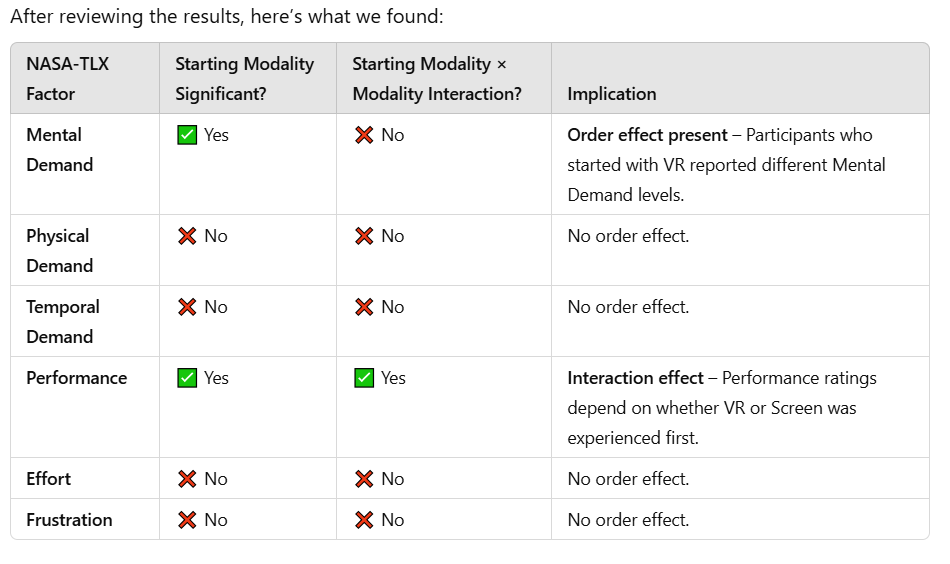

In [58]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load the cleaned dataset
file_path = "cleaned_nasa_tlx_with_starting_modality.csv"  # Update if needed
df_combined = pd.read_csv(file_path)

# Ensure column names are properly formatted (remove spaces, special characters)
df_combined.columns = df_combined.columns.str.replace(" ", "_").str.replace("-", "_")

# Ensure categorical variables are properly formatted
df_combined["Controller"] = df_combined["Controller"].astype("category")
df_combined["Modality"] = df_combined["Modality"].astype("category")
df_combined["Starting_Modality"] = df_combined["Starting_Modality"].astype("category")

# Drop rows with missing values to prevent errors
df_combined = df_combined.dropna()

# Perform Two-Way ANOVA including Starting Modality as a factor
order_effects_results = {}

for factor in ["Mental_Demand", "Physical_Demand", "Temporal_Demand", "Performance", "Effort", "Frustration"]:
    try:
        # Fit an ANOVA model with interaction terms
        model = smf.ols(f"{factor} ~ C(Controller) * C(Modality) * C(Starting_Modality)", data=df_combined).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        order_effects_results[factor] = anova_table
    except Exception as e:
        order_effects_results[factor] = str(e)

# Display results
for factor, result_df in order_effects_results.items():
    print(f"\n### Order Effects Analysis for {factor} ###\n")
    print(result_df)



### Order Effects Analysis for Mental_Demand ###

                                                   sum_sq    df         F  \
C(Controller)                                       5.625   1.0  0.015177   
C(Modality)                                      2805.625   1.0  7.569983   
C(Starting_Modality)                                0.625   1.0  0.001686   
C(Controller):C(Modality)                          75.625   1.0  0.204047   
C(Controller):C(Starting_Modality)                275.625   1.0  0.743676   
C(Modality):C(Starting_Modality)                    0.625   1.0  0.001686   
C(Controller):C(Modality):C(Starting_Modality)      0.625   1.0  0.001686   
Residual                                        11860.000  32.0       NaN   

                                                  PR(>F)  
C(Controller)                                   0.902723  
C(Modality)                                     0.009689  
C(Starting_Modality)                            0.967499  
C(Controller):C(Mod